Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise06/exercise06.ipynb)

# Exercise 6

## Problem

In class this week, we saw how to access real-time data about Capital Bikeshare from the internet using their API. We also dealt with the challenge of wrangling those data. We needed to parse a JSON file into a table, and we considered how we might retrieve, store, and combine many JSONs in order to understand how bike availability changed over time.

These real-time data can help us answer questions about how well Captial Bikeshare is being utilized.

See if you can use data from the API (I have already stored and combined it--see below) answer these questions:
- How many bikes were available within the system during each hour over a 24 hour period?
    - Can you graph this over time?
    - Which hour of the day were bikes most available? Least available?

**Bonus:** Can you write a function to estimate how many bikes are <ins>currently being used</ins>, whenever you call the function? This will require loading real-time data from the API and comparing it to stored data.

## Data

I wrote a script, which you can see [here](https://github.com/ncsg/ursp688y_sp2024/blob/main/demos/demo06/cabi_data/get_cabi_free_bikes.py), to retrieve and store JSON data from the `free_bike_status` table in [Capital Bikeshare's](https://capitalbikeshare.com/system-data) GBFS feed every 5 minutes. I ran this script on my computer for a bit more than 24 hours. ([Here's a tutorial](https://realpython.com/run-python-scripts/) on running scripts on the command line, if you're curious.) All of those JSONS are available for you to use. They're stored at [`ursp688y_sp2024/demos/demo06/cabi_data`](https://github.com/ncsg/ursp688y_sp2024/tree/main/demos/demo06/cabi_data).

## Building Off of the Demo

The in-class demo gave us a starting point for how to access real-time JSON data from the API, load saved JSON data, and parse JSON data into a DataFrame.

I have copied what we did in class below and added onto it to develop a single tidy dataframe with records from all the saved JSONs, plus timestamps. This should be all the data you need for the questions above (except the bonus).

See if you can follow my code, then build onto it.

As usual, please wrap the code for your solution in a function, and put that function into a module (you can add to my module, or make a new one if you prefer). Then load your main function from the module and call it in the notebook to demonstrate your solution.


# Setup

In [1]:
# Import packages
import os
import json
import requests
import pandas as pd

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set the working directory
# You will need to change this to your own folder on Google Drive
os.chdir('/content/drive/MyDrive/Amanguah/URSP668Y_Data_Science/Amanguah_Exercise_folder/ncsg ursp688y_sp2024 main exercises-exercise06')

In [4]:
# Import module
import exercise06

# Request current data from the API

In [5]:
# Making a get request
response = requests.get('https://gbfs.lyft.com/gbfs/1.1/dca-cabi/en/free_bike_status.json')

# Get JSON content
data = response.json()

# Inspect the contents
data.keys()

dict_keys(['data', 'last_updated', 'ttl', 'version'])

In [6]:
# Make a dataframe out of data for available bikes
df = pd.DataFrame(data['data']['bikes'])

df.head()

,fusion_lon,is_disabled,lon,fusion_lat,lat,bike_id,name,is_reserved,type,rental_uris
0,0.0,0,-76.998625,0.0,38.918918,35695319f52f332ffa661d0f41bcbbeb,222-581,0,electric_bike,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ..."
1,0.0,0,-77.076675,0.0,38.896280,de45e732d911e54b44d3fca2674486da,570-760,0,electric_bike,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ..."
2,0.0,0,-76.985155,0.0,38.920024,a79e6293f4aa7e1f8c680da8fe9b3c71,799-656,0,electric_bike,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ..."
3,0.0,0,-77.026518,0.0,38.958386,20ab1ff5bf8304387e715e9c2072f9f5,688-605,0,electric_bike,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ..."
4,0.0,0,-77.048581,0.0,38.904253,ab8f4ccb1269fdd54860e97f13d2afc7,374-374,0,electric_bike,"{'ios': 'https://dc.lft.to/lastmile_qr_scan', ..."


# Load JSON data saved in a file

In [7]:
# open a single stored json
with open('cabi_data/cabi_bike_status_2024-03-03_13-11-54.json') as json_data: # Notice how I added 'cabi_data/' to the front of the path to get into that subdirectory where the jsons are stored?
    data = json.load(json_data)
    json_data.close()

In [8]:
# see how the data are stored
type(data)

dict

In [9]:
# see what keys are available
data.keys()

dict_keys(['data', 'last_updated', 'ttl', 'version'])

In [10]:
# drill into the records for each bike
records = data['data']['bikes']

# convert to a dataframe
df = pd.DataFrame(records)

# drop a column that we won't use, just to keep things clean
df = df.drop(columns=['rental_uris'])

In [11]:
df.head()

,is_reserved,fusion_lon,fusion_lat,lat,type,is_disabled,bike_id,name,lon
0,0,0.0,0.0,38.887458,electric_bike,0,d94788433d337e4186fb431076b52e91,320-065,-77.025747
1,0,0.0,0.0,38.905328,electric_bike,0,cc49246f85fdc23a6a13b3402ab52b37,222-581,-77.058526
2,0,0.0,0.0,38.908954,electric_bike,0,75c5df17a8236707a7948f509a5ab929,228-812,-77.043055
3,0,0.0,0.0,38.955421,electric_bike,0,4e51a79c1e03962064762ff16013b1a8,570-760,-76.940135
4,0,0.0,0.0,38.892292,electric_bike,0,5983a1b66f086f7905d8aa701fa7b5df,268-224,-77.042912


# Iteratively load all the JSON files and combine them into a single dataframe

Except for the impact statements above, this is probably the only part of the code you'll need to keep. This function wraps all the loading steps. Feel free to delete the cells above if you're not using them.

In [12]:
df = exercise06.load_and_combine_free_bike_status_jsons_as_df('cabi_data')

df.head()

,is_reserved,fusion_lon,fusion_lat,lat,type,is_disabled,bike_id,name,lon,timestamp
0,0,0.0,0.0,38.887477,electric_bike,0,d94788433d337e4186fb431076b52e91,320-065,-77.025773,2024-03-03 15:26:08-05:00
1,0,0.0,0.0,38.905307,electric_bike,0,cc49246f85fdc23a6a13b3402ab52b37,222-581,-77.058533,2024-03-03 15:26:08-05:00
2,0,0.0,0.0,38.908969,electric_bike,0,f0c94f3fdd9994b708dc2005455a2b0e,228-812,-77.042914,2024-03-03 15:26:08-05:00
3,0,0.0,0.0,38.955433,electric_bike,0,4e51a79c1e03962064762ff16013b1a8,570-760,-76.940148,2024-03-03 15:26:08-05:00
4,0,0.0,0.0,38.892279,electric_bike,0,5983a1b66f086f7905d8aa701fa7b5df,268-224,-77.042903,2024-03-03 15:26:08-05:00


In [13]:
df['timestamp'].max()

Timestamp('2024-03-04 17:57:43-0500', tz='US/Eastern')

This is where you take over. Can you use this dataframe to answer the question(s) above?

In [23]:
# Convert 'timestamp' column to datetime format and extract the hour
# Grouping by hour and counting bike availability
# Print the bike availability for each hour

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [15]:
df['hour'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S').dt.hour
bike_availability = df.groupby('hour')['name'].count()
bike_availability

hour
0     11134
1     11147
2     11182
3     11236
4     11216
5     11050
6     10716
7     10552
8     10231
9     10508
10    10719
11    10587
12    10552
13    10720
14    10712
15    18121
16    20734
17    20720
18    10298
19    10427
20    10483
21    10640
22    10859
23    11000
Name: name, dtype: int64

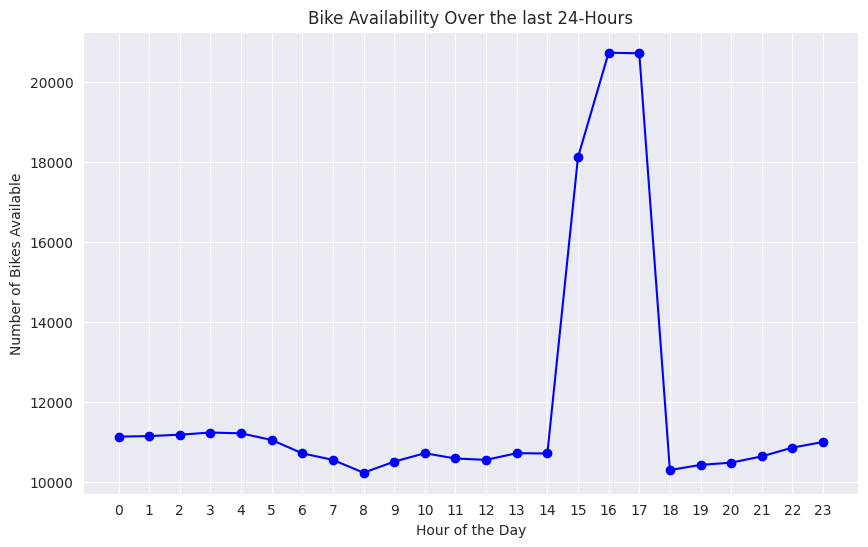

In [24]:
# Convert 'timestamp' column to datetime format and extract the hour
df['hour'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S').dt.hour

# Grouping by hour and counting bike availability
bike_availability = df.groupby('hour')['name'].count()

# Plotting the data
plt.figure(figsize=(10, 6))
bike_availability.plot(kind='line', marker='o', color='b')
plt.title('Bike Availability Over the last 24-Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bikes Available')
plt.xticks(range(24))
plt.grid(True)
plt.show()

In [17]:
# Find the hour with the maximum bike availability
most_available_hour = bike_availability.idxmax()

# Find the hour with the minimum bike availability
least_available_hour = bike_availability.idxmin()

print("Most available hour of the day:", most_available_hour)
print("Least available hour of the day:", least_available_hour)


Most available hour of the day: 16
Least available hour of the day: 8
